In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

# Upload the data check first 5 and last 5 record of given data

In [2]:
df=pd.read_csv("Crop.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


# Size of the data

In [6]:
df.shape

(2200, 8)

# Missing value 

In [7]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


# There is no missing value of the given data

# Exploratory Data Analysis

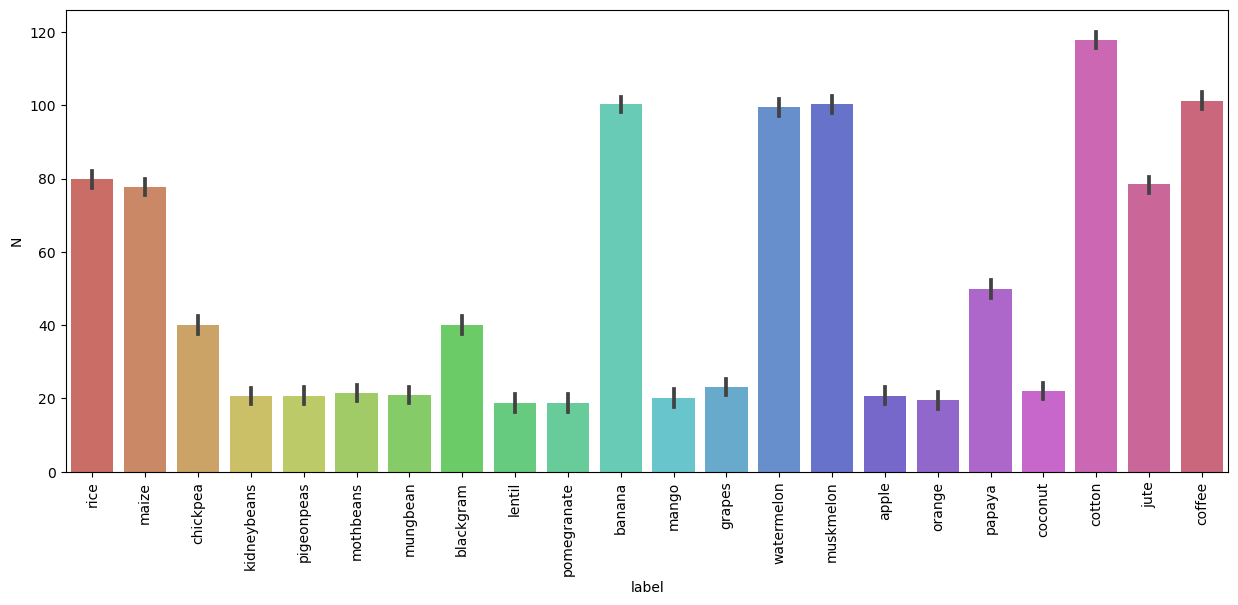

In [8]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'N', x = 'label', data=df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

# We observed that Cotton required High Nitrogen other than crops

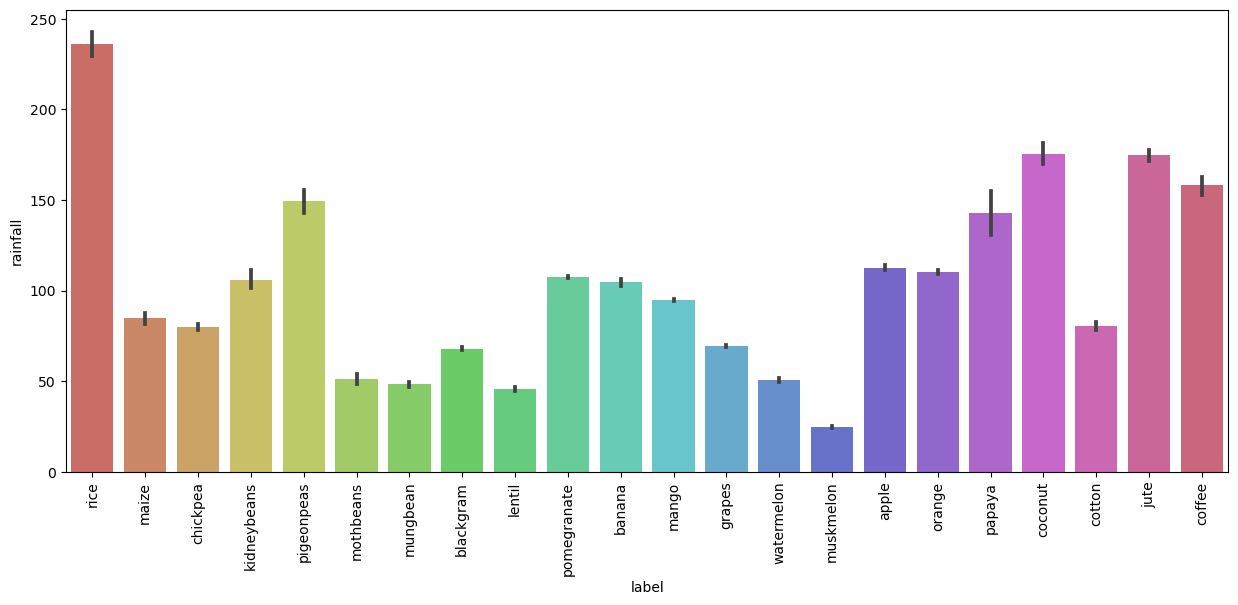

In [9]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'rainfall', x = 'label', data=df, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

# It is observed that rice requires large volume of rainfall compared to all other crops 

# Correlation Matrix

In [10]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


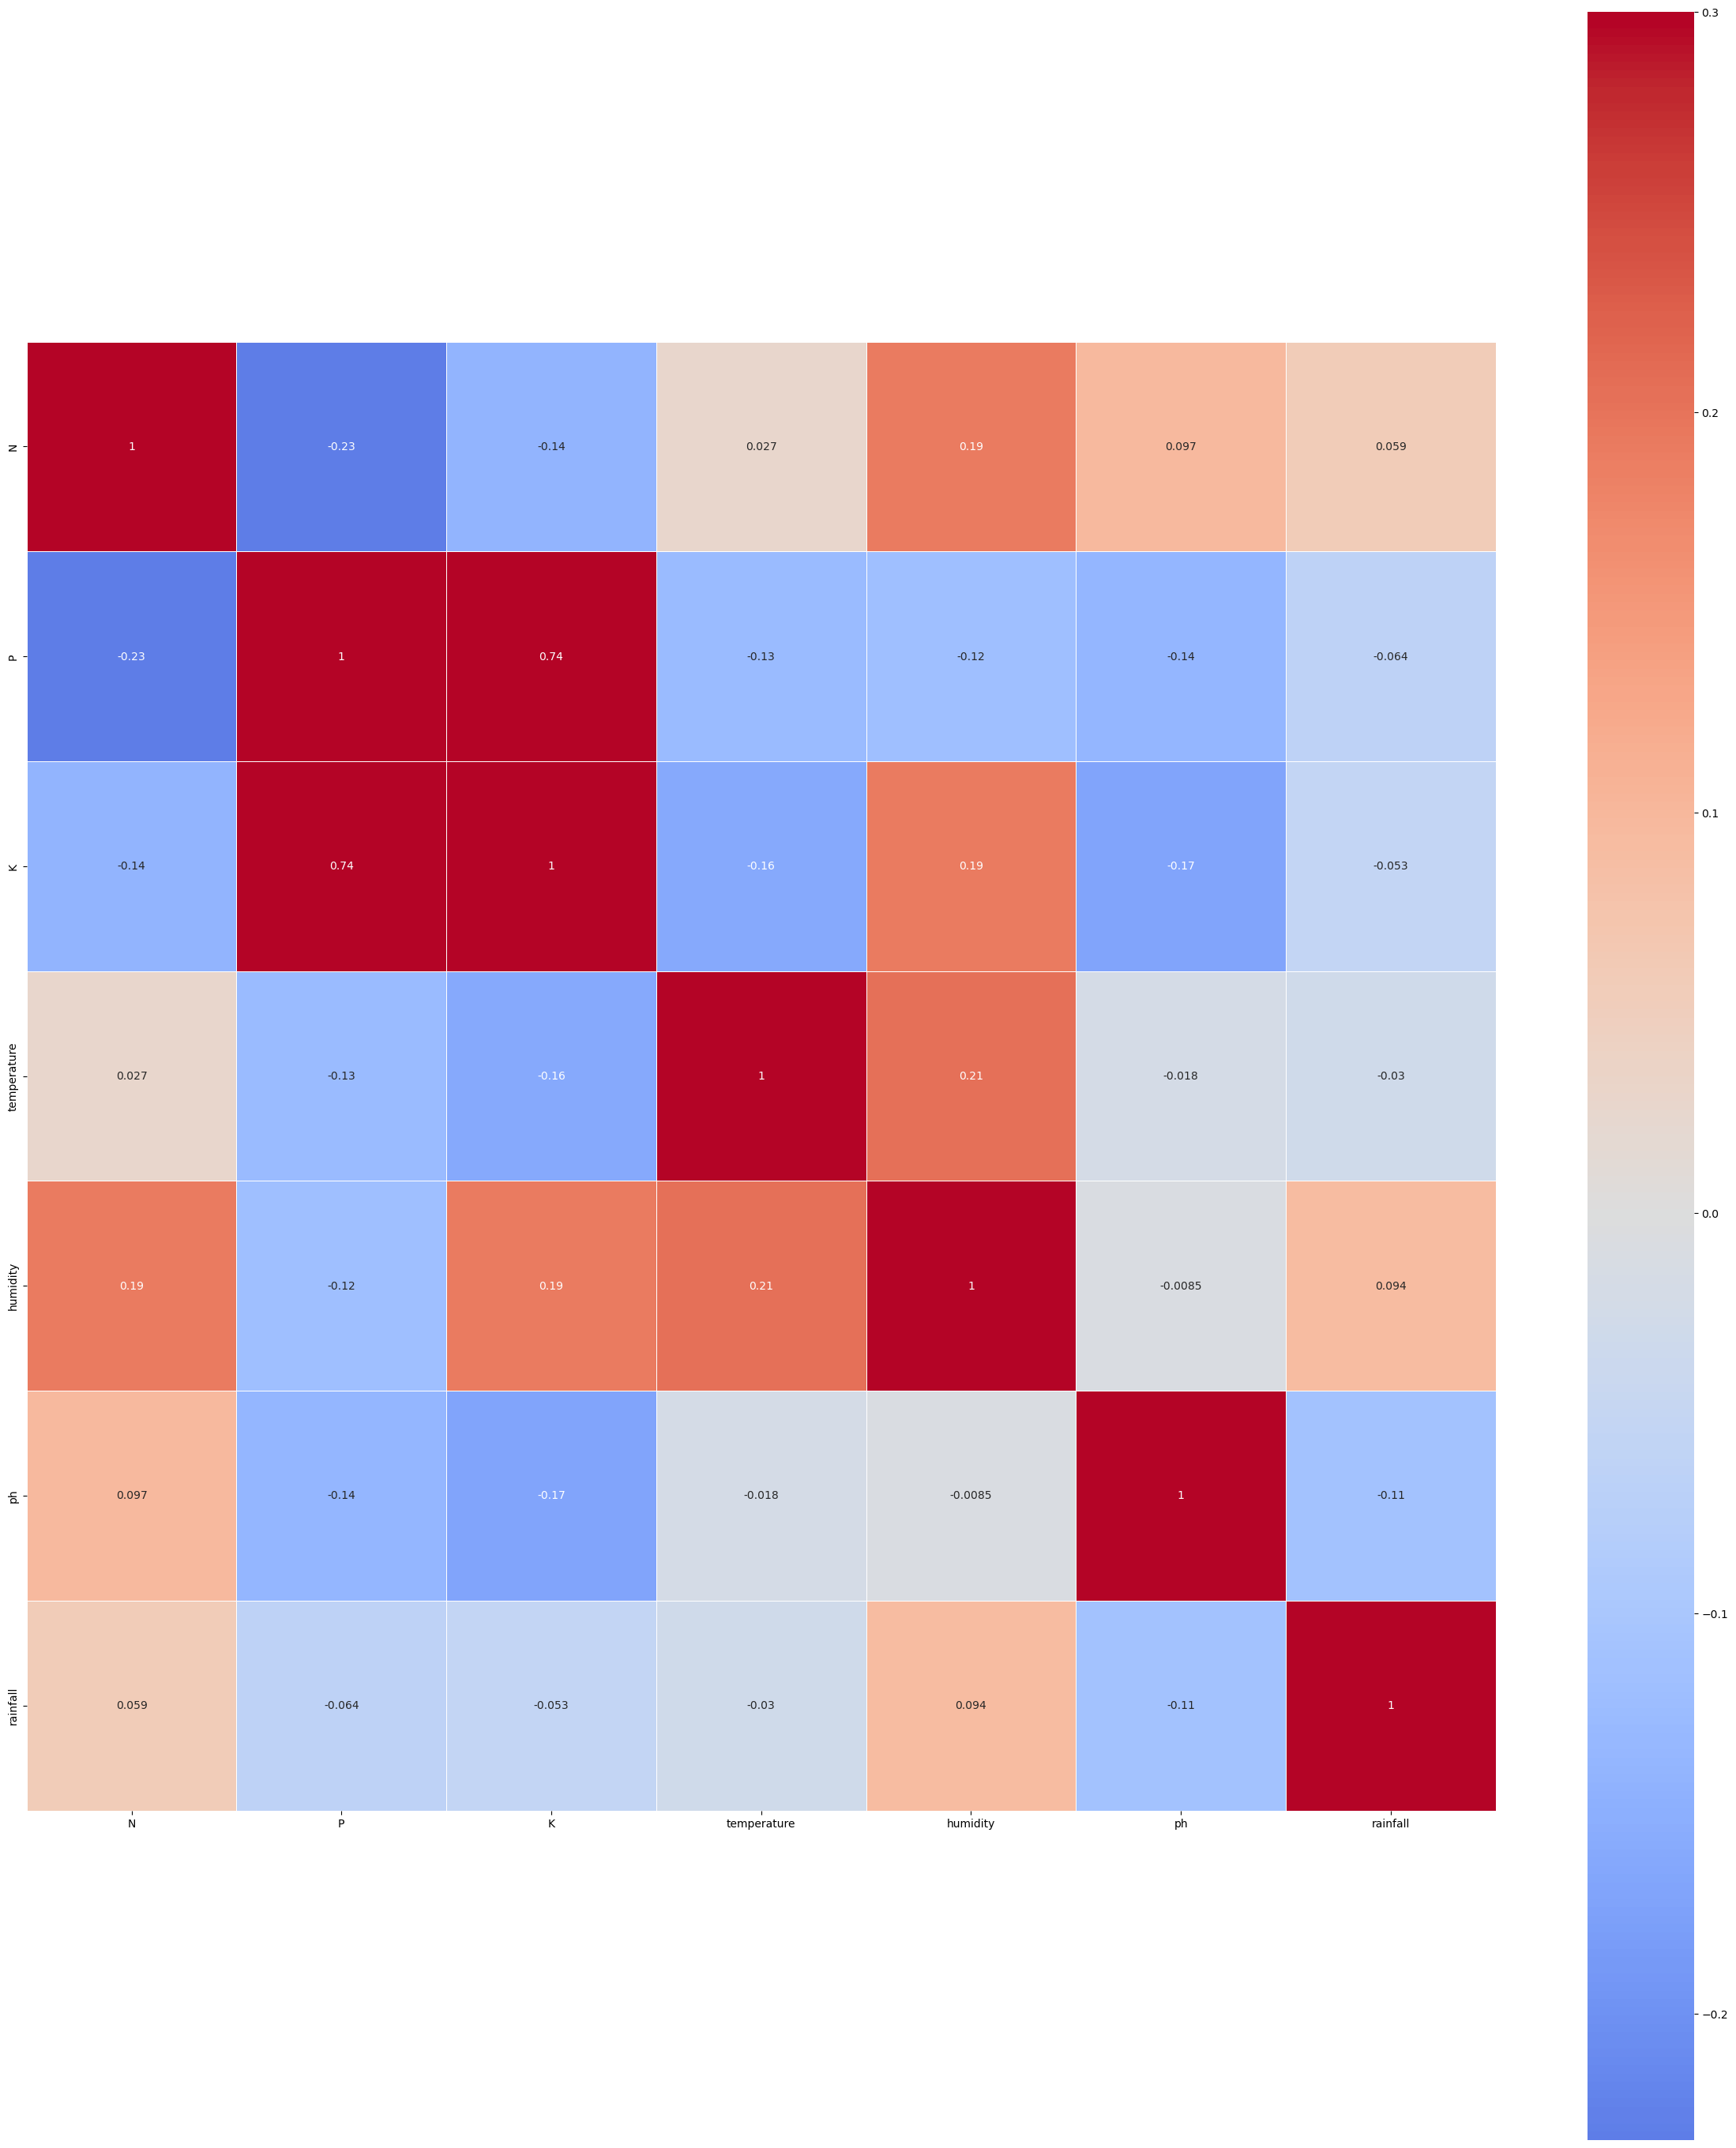

In [11]:
plt.figure(figsize=(30,35))
sns.heatmap(df.corr(),  cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [12]:
from sklearn import preprocessing
from plotly.subplots import make_subplots
from sklearn.metrics import classification_report
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB  
from sklearn.model_selection import train_test_split

# Data Pre-Processing by using Label_encoding

In [13]:
X = df.drop('label' ,axis =1)
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
df['label'] = le.fit_transform(df['label'])
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [17]:
y = df['label']
y.head()

0    20
1    20
2    20
3    20
4    20
Name: label, dtype: int32

In [18]:
model = []
accuracy = []

# Train test split & Model Selection¶

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

# Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train , y_train)

DecisionTreeClassifier()

In [21]:
predict = DT.predict(X_test)

In [22]:
DT_accuracy = DT.score(X_test,y_test)

In [23]:
DT_accuracy

0.9840909090909091

In [24]:
accuracy.append(DT_accuracy)
model.append('Decision Tree')

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train , y_train)

RandomForestClassifier()

In [26]:
RF_accuracy = RF.score(X_test,y_test)
RF_accuracy

0.9954545454545455

In [27]:
accuracy.append(RF_accuracy)
model.append('Random Forest')

## KNN Classifier for Crop prediction. 

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [29]:
knn_accuracy = knn.score(X_test,y_test)
knn_accuracy

0.9704545454545455

In [30]:
accuracy.append(knn_accuracy)
model.append('KNN Classifier')


In [31]:
model

['Decision Tree', 'Random Forest', 'KNN Classifier']

In [32]:
accuracy

[0.9840909090909091, 0.9954545454545455, 0.9704545454545455]

<AxesSubplot:>

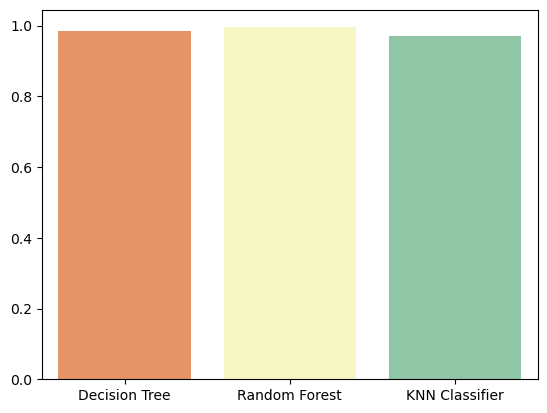

In [33]:
sns.barplot(x = model , y = accuracy ,palette ='Spectral')